# Quantum ML Project - Binary Classification on the Parity problem  | **Best model Notebook**  | Task (b)

Install pennylane

In [9]:
# %pip install pennylane
# %pip install pandas
# %pip install matplotlib

In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer, AdamOptimizer, GradientDescentOptimizer, RMSPropOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# Data
Data is generated using the parity function. The parity function is a function that returns 1 if the number of 1s in the input is odd, and 0 otherwise. The input is a binary string of length n. The parity function is a well-known example of a function that is not efficiently learnable by a classical neural network. However, it can be learned efficiently by a quantum neural network.

## Read

In [2]:
train_classA = np.loadtxt('./data/classA_train.dat')
train_classB = np.loadtxt('./data/classB_train.dat')
test_classA = np.loadtxt('./data/classA_test.dat')
test_classB = np.loadtxt('./data/classB_test.dat')

train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

## Preprocess

In [3]:
train_classA -= 0.5
train_classB -= 0.5
test_classA -= 0.5
test_classB -= 0.5

Creating train and test datasets

In [4]:
train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

test_data = np.vstack((test_classA, test_classB))
test_labels = np.hstack((np.zeros(len(test_classA)), np.ones(len(test_classB))))

Preview

In [5]:
train_data

tensor([[-0.52136932,  0.51634261,  0.57685187],
        [ 0.47967195,  0.47521001, -0.48276349],
        [ 0.45851495,  0.48880249, -0.47751312],
        [ 0.47287287,  0.50130472, -0.48129676],
        [ 0.4490846 ,  0.49955922, -0.53082429],
        [-0.46906929, -0.51708618, -0.51294948],
        [ 0.40494731,  0.57586463, -0.5228194 ],
        [-0.46868174, -0.51639052, -0.50394778],
        [ 0.45230147,  0.53798005, -0.47490086],
        [ 0.44109225, -0.48876122,  0.49780467],
        [ 0.55928369,  0.53811759, -0.49537057],
        [-0.48554956,  0.5311928 ,  0.53043502],
        [-0.49101668, -0.52985789, -0.49328596],
        [ 0.56489058,  0.52622874, -0.47390937],
        [ 0.50082764, -0.5481794 ,  0.49814355],
        [-0.49541045, -0.46895463, -0.44893712],
        [-0.45864197, -0.47720196, -0.53279515],
        [ 0.56208121, -0.49005089,  0.50610096],
        [-0.57611053,  0.46526223,  0.47765986],
        [ 0.4342591 , -0.49482992,  0.52829108],
        [-0.4194763 

In [6]:
test_data

tensor([[ 0.4879638 ,  0.54024352, -0.46494221],
        [-0.49177858, -0.51371639, -0.47245236],
        [ 0.49295538, -0.4814586 ,  0.48787918],
        [ 0.55597339,  0.5324364 , -0.49658654],
        [-0.52495464, -0.48868671, -0.51545709],
        [-0.45134428, -0.52187662, -0.53744429],
        [-0.51112591,  0.53013485,  0.51654904],
        [ 0.52916993, -0.49962332,  0.51428079],
        [-0.4897708 ,  0.4922424 ,  0.5334223 ],
        [-0.46431262, -0.45484039, -0.50036212],
        [ 0.51488301, -0.53164158, -0.52451988],
        [-0.49771912,  0.52398959, -0.49891081],
        [-0.50994703,  0.45064989, -0.48652751],
        [ 0.41944514, -0.54143044, -0.54457641],
        [ 0.52296955, -0.50002518, -0.52334696],
        [-0.45378063,  0.47989627, -0.47546236],
        [-0.47659954,  0.4897321 , -0.51949139],
        [-0.4566875 ,  0.51162301, -0.47473584],
        [ 0.45832342,  0.51347606,  0.48019078],
        [ 0.46999107, -0.51461362, -0.50094802]], requires_grad=True)

## Visualizing input data

2-dimensional. showing the difficulty of the problem in a 2-dimensional space.

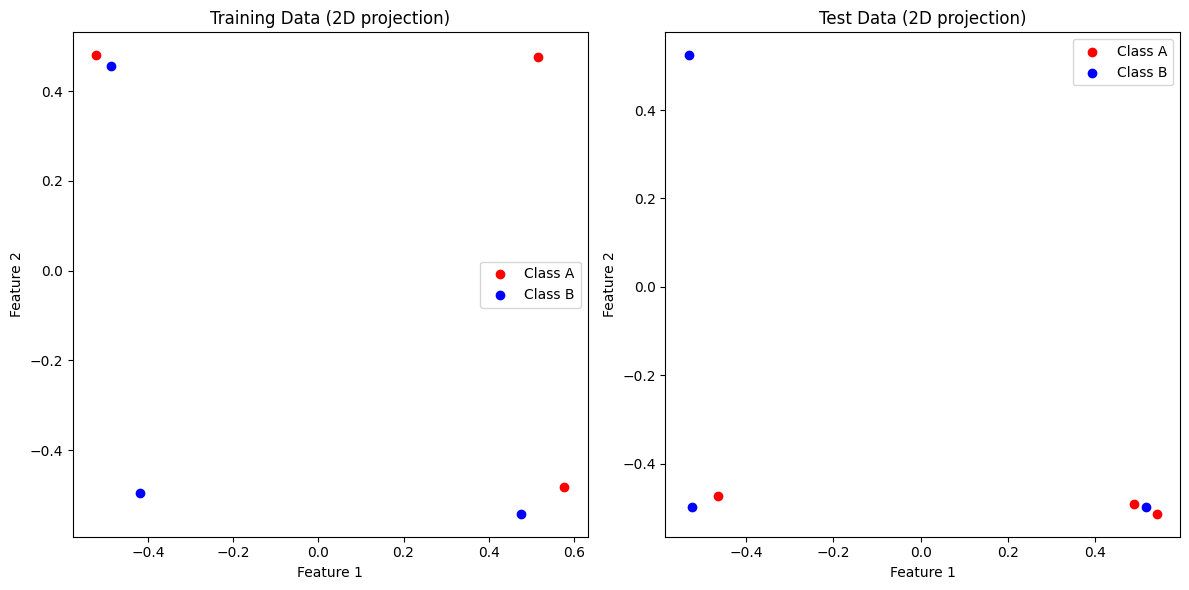

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(train_classA[0], train_classA[1], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], color='blue', label='Class B')
ax1.set_title('Training Data (2D projection)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()

ax2.scatter(test_classA[0], test_classA[1], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], color='blue', label='Class B')
ax2.set_title('Test Data (2D projection)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()

3-dimensional. Cubes are now well separated.

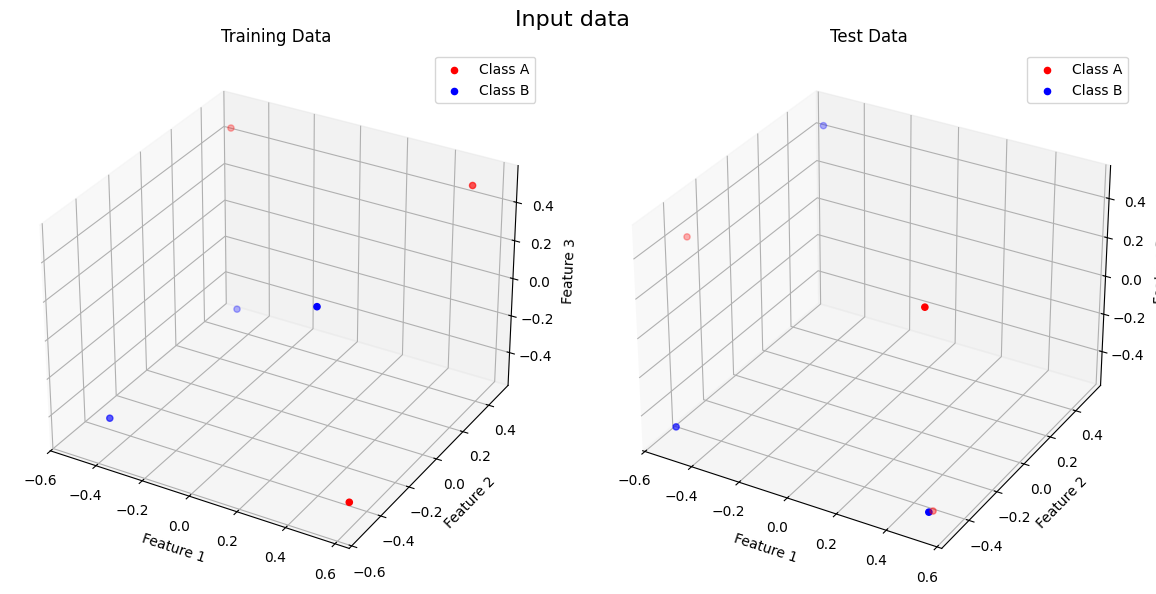

In [8]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(train_classA[0], train_classA[1], train_classA[2], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], train_classB[2], color='blue', label='Class B')
ax1.set_title('Training Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_classA[0], test_classA[1], test_classA[2], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], test_classB[2], color='blue', label='Class B')
ax2.set_title('Test Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

fig.suptitle('Input data', fontsize=16)
plt.tight_layout()
plt.show()

# Quantum Binary Classifiers - Different Circuit Architectures

For building the classifier I will use the pennylane python toolkit.

In [9]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss += (l - p) ** 2
    loss /= len(labels)
    return loss

In [10]:
def plot_metrics(iterations, train_losses, train_accuracies, test_accuracies):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].plot(iterations, train_losses, label='Training Loss')
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Iterations vs Training Loss')
    axs[0].legend()

    axs[1].plot(iterations, train_accuracies, label='Training Accuracy', color='orange')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Iterations vs Training Accuracy')
    axs[1].legend()

    axs[2].plot(iterations, test_accuracies, label='Test Accuracy', color='green')
    axs[2].set_xlabel('Iterations')
    axs[2].set_ylabel('Accuracy')
    axs[2].set_title('Iterations vs Test Accuracy')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

## Data reUploading Circuit

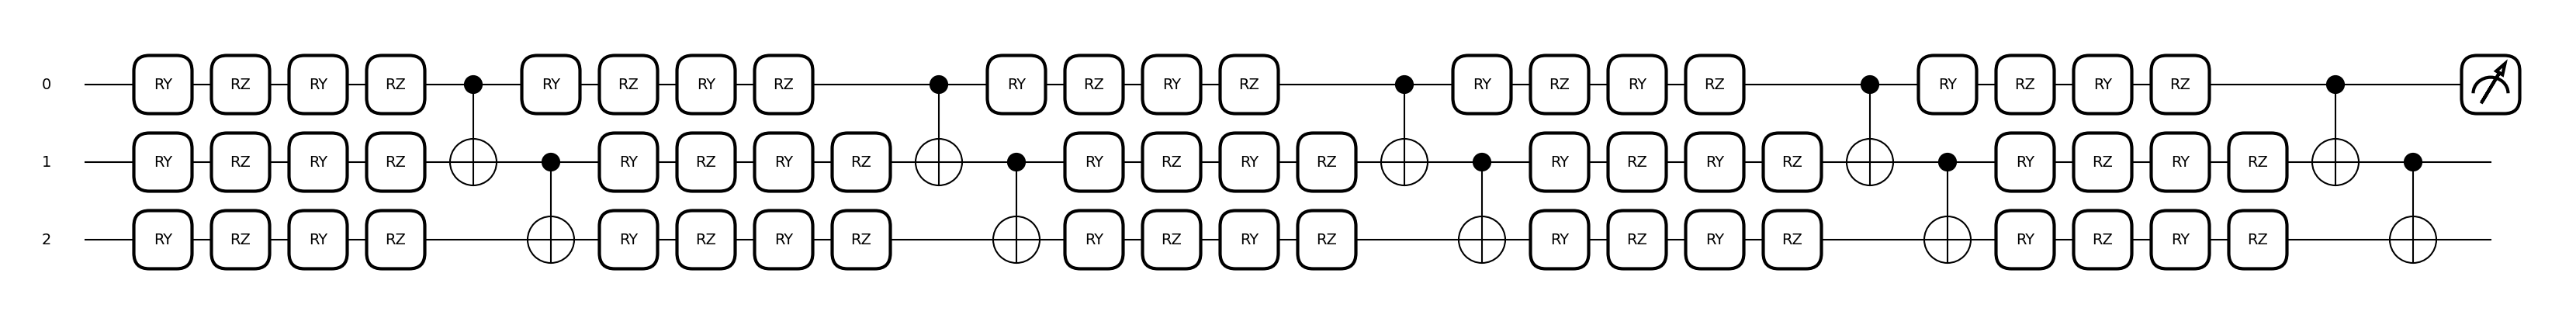

In [11]:
n_qubits = train_data.shape[1]
num_reuploads = 5
dev = qml.device("default.qubit", wires=n_qubits)

def circuit(weights, x):
    for layer in range(num_reuploads):
        for i in range(n_qubits):
            qml.RY(x[i], wires=i)
            qml.RZ(weights[layer, i, 0], wires=i)
            qml.RY(weights[layer, i, 1], wires=i)
            qml.RZ(weights[layer, i, 2], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
    return qml.expval(qml.PauliZ(0))

qnode = qml.QNode(circuit, dev)

weights_init = 0.01 * np.random.randn(num_reuploads, n_qubits, 3)
fig, ax = qml.draw_mpl(circuit)(weights_init, np.zeros(n_qubits))
plt.show()

def variational_classifier(weights, bias, x):
    return qnode(weights, x) + bias

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

def train(X, Y, num_reuploads, optimizer, learning_rate=0.1, epochs=50, batch_size=5):
    np.random.seed(0)
    weights_init = 0.01 * np.random.randn(num_reuploads, n_qubits, 3)
    bias_init = np.array(0.0, requires_grad=True)

    opt = optimizer(learning_rate)
    weights = weights_init
    bias = bias_init

    train_costs = []
    test_accuracies = []
    train_accuracies = []

    for it in range(epochs):
        batch_index = np.random.randint(0, len(X), (batch_size,))
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)
        
        train_predictions = [variational_classifier(weights, bias, x) for x in X]
        train_acc = np.mean((np.array(train_predictions) > 0.5) == Y)
        
        test_predictions = [variational_classifier(weights, bias, x) for x in test_data]
        test_acc = np.mean((np.array(test_predictions) > 0.5) == test_labels)
        
        train_costs.append(cost(weights, bias, X, Y))
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        print(f"Iter: {it+1} | Train Cost: {cost(weights, bias, X, Y):.4f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    
    return weights, bias, train_costs, train_accuracies, test_accuracies


In [12]:
def evaluate(weights, bias, X, Y):
    predictions = np.array([variational_classifier(weights, bias, x) for x in X])
    accuracy = np.mean((predictions > 0.5) == Y)
    print(f"Accuracy: {accuracy:.4f}")
    return predictions, accuracy

def visualize_performance(X, Y, predictions):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    correctly_classified = (predictions > 0.5) == Y
    incorrectly_classified = ~correctly_classified

    ax.scatter(X[correctly_classified, 0], X[correctly_classified, 1], X[correctly_classified, 2], c='green', marker='o', label='Correctly Classified')
    ax.scatter(X[incorrectly_classified, 0], X[incorrectly_classified, 1], X[incorrectly_classified, 2], c='red', marker='x', label='Incorrectly Classified')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title("Data Classification Performance")
    ax.legend()
    plt.show()

Iter: 1 | Train Cost: 0.4194 | Train Accuracy: 0.4500 | Test Accuracy: 0.5500
Iter: 2 | Train Cost: 0.3766 | Train Accuracy: 0.4500 | Test Accuracy: 0.5000
Iter: 3 | Train Cost: 0.3351 | Train Accuracy: 0.4750 | Test Accuracy: 0.5500
Iter: 4 | Train Cost: 0.3307 | Train Accuracy: 0.5500 | Test Accuracy: 0.5500
Iter: 5 | Train Cost: 0.3612 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 6 | Train Cost: 0.2992 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 7 | Train Cost: 0.2492 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 8 | Train Cost: 0.2171 | Train Accuracy: 0.6500 | Test Accuracy: 0.6500
Iter: 9 | Train Cost: 0.1923 | Train Accuracy: 0.8000 | Test Accuracy: 0.9000
Iter: 10 | Train Cost: 0.1779 | Train Accuracy: 0.8000 | Test Accuracy: 0.9000
Iter: 11 | Train Cost: 0.1672 | Train Accuracy: 0.7750 | Test Accuracy: 0.9000
Iter: 12 | Train Cost: 0.1661 | Train Accuracy: 0.7250 | Test Accuracy: 1.0000
Iter: 13 | Train Cost: 0.1780 | Train Accuracy: 0.6250 | Test

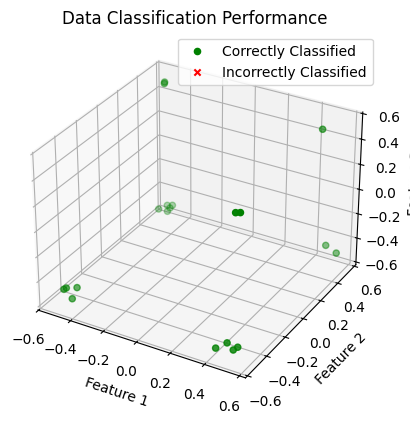

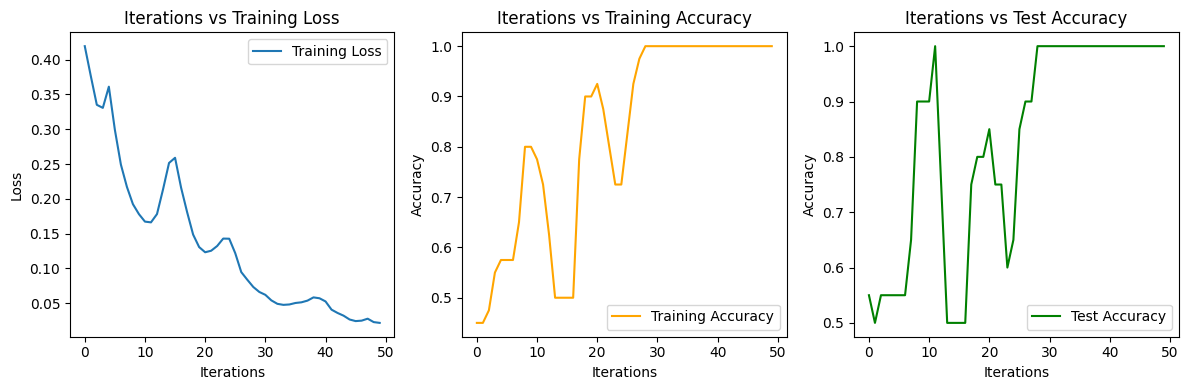

In [14]:
# Train the model
epochs = 50
weights, bias, train_costs, train_accuracies, test_accuracies = train(train_data, train_labels, num_reuploads, AdamOptimizer, learning_rate=0.1, epochs=epochs, batch_size=5)

# Evaluate the model on test data
predictions, accuracy = evaluate(weights, bias, test_data, test_labels)

# Visualize the performance
visualize_performance(test_data, test_labels, predictions)
plot_metrics(range(0, epochs), train_costs, train_accuracies, test_accuracies)

## Compare different classical optimization methods 

In [33]:
optimizers = {
    "Adam": AdamOptimizer,
    "GradientDescent": GradientDescentOptimizer,
    "NesterovMomentum": NesterovMomentumOptimizer,
    "RMSProp": RMSPropOptimizer
}

epochs = 50
batch_size = 5

results = pd.DataFrame(columns=["Epoch", "Optimizer", "Learning Rate", "Train Loss", "Train Accuracy", "Test Accuracy"])

for opt_name, optimizer in optimizers.items():
    for lr in [0.5, 0.2, 0.1]:
        weights, bias, train_costs, train_accuracies, test_accuracies = train(train_data, 
                                                                              train_labels, 
                                                                              num_reuploads, 
                                                                              optimizer, 
                                                                              learning_rate=lr, 
                                                                              epochs=epochs, batch_size=5)
        
        for epoch in range(epochs):
            new_row = {
                "Epoch": epoch + 1,
                "Optimizer": opt_name,
                "Learning Rate": lr,
                "Train Loss": train_costs[epoch],
                "Train Accuracy": train_accuracies[epoch],
                "Test Accuracy": test_accuracies[epoch]
            }
            results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

print(results)

Iter: 1 | Train Cost: 1.1644 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 2 | Train Cost: 0.9438 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 3 | Train Cost: 0.3164 | Train Accuracy: 0.4750 | Test Accuracy: 0.5000
Iter: 4 | Train Cost: 0.3013 | Train Accuracy: 0.4250 | Test Accuracy: 0.5000
Iter: 5 | Train Cost: 0.5642 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 6 | Train Cost: 0.7095 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 7 | Train Cost: 0.6617 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 8 | Train Cost: 0.4773 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 9 | Train Cost: 0.3438 | Train Accuracy: 0.5000 | Test Accuracy: 0.5000
Iter: 10 | Train Cost: 0.3103 | Train Accuracy: 0.4250 | Test Accuracy: 0.3500
Iter: 11 | Train Cost: 0.2676 | Train Accuracy: 0.4000 | Test Accuracy: 0.2500
Iter: 12 | Train Cost: 0.2207 | Train Accuracy: 0.5750 | Test Accuracy: 0.4000
Iter: 13 | Train Cost: 0.2087 | Train Accuracy: 0.6250 | Test

C:\Users\nikol\AppData\Local\Temp\ipykernel_15856\4158386410.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


Iter: 1 | Train Cost: 0.3767 | Train Accuracy: 0.5250 | Test Accuracy: 0.5000
Iter: 2 | Train Cost: 0.3358 | Train Accuracy: 0.4250 | Test Accuracy: 0.5500
Iter: 3 | Train Cost: 0.3143 | Train Accuracy: 0.5750 | Test Accuracy: 0.8000
Iter: 4 | Train Cost: 0.3869 | Train Accuracy: 0.5750 | Test Accuracy: 0.5500
Iter: 5 | Train Cost: 0.4041 | Train Accuracy: 0.4250 | Test Accuracy: 0.5500
Iter: 6 | Train Cost: 0.3391 | Train Accuracy: 0.4000 | Test Accuracy: 0.5500
Iter: 7 | Train Cost: 0.2936 | Train Accuracy: 0.5250 | Test Accuracy: 0.8000
Iter: 8 | Train Cost: 0.2795 | Train Accuracy: 0.3250 | Test Accuracy: 0.5500
Iter: 9 | Train Cost: 0.2808 | Train Accuracy: 0.5750 | Test Accuracy: 0.5000
Iter: 10 | Train Cost: 0.2730 | Train Accuracy: 0.4250 | Test Accuracy: 0.3000
Iter: 11 | Train Cost: 0.2524 | Train Accuracy: 0.5750 | Test Accuracy: 0.4000
Iter: 12 | Train Cost: 0.2653 | Train Accuracy: 0.5000 | Test Accuracy: 0.5500
Iter: 13 | Train Cost: 0.2882 | Train Accuracy: 0.5250 | Test

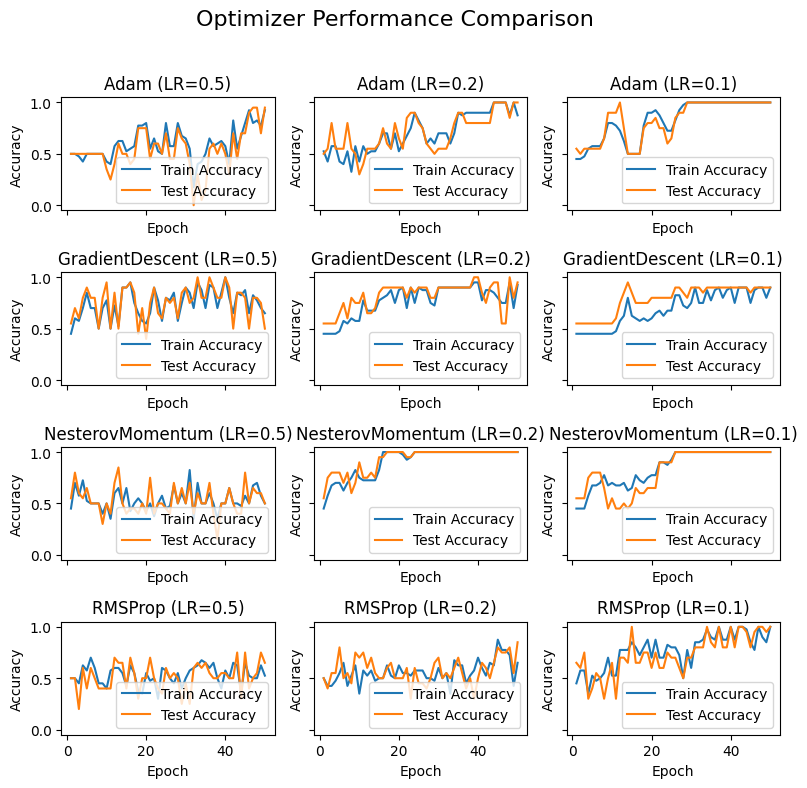

In [34]:
def plot_results(results):
    optimizers = results["Optimizer"].unique()
    learning_rates = results["Learning Rate"].unique()

    fig, axes = plt.subplots(len(optimizers), len(learning_rates), figsize=(8, 8), sharex=True, sharey=True)
    fig.suptitle('Optimizer Performance Comparison', fontsize=16)

    for i, optimizer in enumerate(optimizers):
        for j, lr in enumerate(learning_rates):
            subset = results[(results["Optimizer"] == optimizer) & (results["Learning Rate"] == lr)]
            ax = axes[i, j]
            ax.plot(subset["Epoch"], subset["Train Accuracy"], label="Train Accuracy")
            ax.plot(subset["Epoch"], subset["Test Accuracy"], label="Test Accuracy")
            ax.set_title(f"{optimizer} (LR={lr})")
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_results(results)

In [35]:
results_best=results[results['Test Accuracy']==results['Test Accuracy'].max()]

def create_latex_table(df):
    table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|c|}\n\\hline\n"
    table += "Epoch & Optimizer & Learning Rate & Train Loss & Train Accuracy & Test Accuracy \\\\\n\\hline\n"
    
    for index, row in df.iterrows():
        table += f"{row['Epoch']} & {row['Optimizer']} & {row['Learning Rate']} & "
        table += f"{row['Train Loss']:.4f} & {row['Train Accuracy']:.4f} & {row['Test Accuracy']:.4f} \\\\\n"
    
    table += "\\hline\n\\end{tabular}\n\\caption{Training and Testing Results}\n\\label{table:results}\n\\end{table}"
    return table

for opt in results_best['Optimizer'].unique():
    results_best_opt = results_best[results_best['Optimizer'] == opt]
    print(f"Results for {opt}")
    print(create_latex_table(results_best_opt))
    print("\n")
latex_table = create_latex_table(results_best)
print(latex_table)


Results for Adam
\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
Epoch & Optimizer & Learning Rate & Train Loss & Train Accuracy & Test Accuracy \\
\hline
44 & Adam & 0.2 & 0.0704 & 1.0000 & 1.0000 \\
45 & Adam & 0.2 & 0.0791 & 1.0000 & 1.0000 \\
46 & Adam & 0.2 & 0.0605 & 1.0000 & 1.0000 \\
47 & Adam & 0.2 & 0.0712 & 1.0000 & 1.0000 \\
49 & Adam & 0.2 & 0.0892 & 1.0000 & 1.0000 \\
50 & Adam & 0.2 & 0.0861 & 0.8750 & 1.0000 \\
12 & Adam & 0.1 & 0.1661 & 0.7250 & 1.0000 \\
29 & Adam & 0.1 & 0.0732 & 1.0000 & 1.0000 \\
30 & Adam & 0.1 & 0.0660 & 1.0000 & 1.0000 \\
31 & Adam & 0.1 & 0.0619 & 1.0000 & 1.0000 \\
32 & Adam & 0.1 & 0.0539 & 1.0000 & 1.0000 \\
33 & Adam & 0.1 & 0.0490 & 1.0000 & 1.0000 \\
34 & Adam & 0.1 & 0.0475 & 1.0000 & 1.0000 \\
35 & Adam & 0.1 & 0.0481 & 1.0000 & 1.0000 \\
36 & Adam & 0.1 & 0.0502 & 1.0000 & 1.0000 \\
37 & Adam & 0.1 & 0.0512 & 1.0000 & 1.0000 \\
38 & Adam & 0.1 & 0.0536 & 1.0000 & 1.0000 \\
39 & Adam & 0.1 & 0.0582 & 1.0000 & 1.0000 \

In [ ]:
results_best=results[results['Test Accuracy']==results['Test Accuracy'].max()]

def create_latex_table(df):
    table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|c|c|c|}\n\\hline\n"
    table += "Epoch & Optimizer & Learning Rate & Train Loss & Train Accuracy & Test Accuracy \\\\\n\\hline\n"
    
    for index, row in df.iterrows():
        table += f"{row['Epoch']} & {row['Optimizer']} & {row['Learning Rate']} & "
        table += f"{row['Train Loss']:.4f} & {row['Train Accuracy']:.4f} & {row['Test Accuracy']:.4f} \\\\\n"
    
    table += "\\hline\n\\end{tabular}\n\\caption{Training and Testing Results}\n\\label{table:results}\n\\end{table}"
    return table

latex_table = create_latex_table(results_best)
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|c|c|}
\hline
Epoch & Optimizer & Learning Rate & Train Loss & Train Accuracy & Test Accuracy \\
\hline
12 & Adam & 0.1 & 0.1661 & 0.7250 & 1.0000 \\
29 & Adam & 0.1 & 0.0732 & 1.0000 & 1.0000 \\
30 & Adam & 0.1 & 0.0660 & 1.0000 & 1.0000 \\
31 & Adam & 0.1 & 0.0619 & 1.0000 & 1.0000 \\
32 & Adam & 0.1 & 0.0539 & 1.0000 & 1.0000 \\
33 & Adam & 0.1 & 0.0490 & 1.0000 & 1.0000 \\
34 & Adam & 0.1 & 0.0475 & 1.0000 & 1.0000 \\
35 & Adam & 0.1 & 0.0481 & 1.0000 & 1.0000 \\
36 & Adam & 0.1 & 0.0502 & 1.0000 & 1.0000 \\
37 & Adam & 0.1 & 0.0512 & 1.0000 & 1.0000 \\
38 & Adam & 0.1 & 0.0536 & 1.0000 & 1.0000 \\
39 & Adam & 0.1 & 0.0582 & 1.0000 & 1.0000 \\
40 & Adam & 0.1 & 0.0570 & 1.0000 & 1.0000 \\
41 & Adam & 0.1 & 0.0524 & 1.0000 & 1.0000 \\
42 & Adam & 0.1 & 0.0406 & 1.0000 & 1.0000 \\
43 & Adam & 0.1 & 0.0358 & 1.0000 & 1.0000 \\
44 & Adam & 0.1 & 0.0319 & 1.0000 & 1.0000 \\
45 & Adam & 0.1 & 0.0264 & 1.0000 & 1.0000 \\
46 & Adam & 0.1